# Importing Libraries

In [5]:
!pip install tensorflow
!pip install keras
!pip install pandas as pd
!pip install numpy
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Testing the Positional Encoding method

In [6]:
import numpy as np
import tensorflow as tf

def positional_encoding(positions, d):

    pos = np.arange(positions)[:, np.newaxis]

    k = np.arange(d)[np.newaxis, :]

    i = k//2
    angle_rads = pos/(10000 ** (2*i/d))

    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)

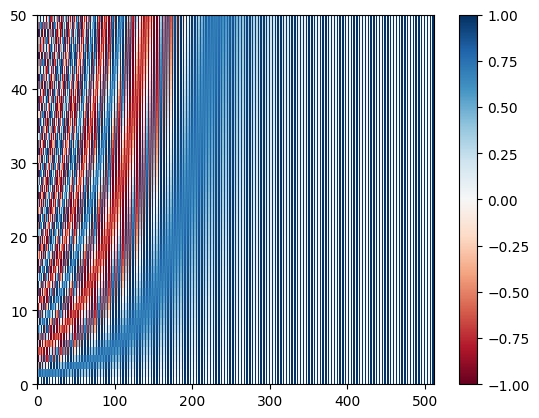

In [7]:
import matplotlib.pyplot as plt

positions, d = 50, 512
pos_encoding = positional_encoding(positions, d)

plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlim((0, 512))
plt.colorbar()
plt.show()

# Masking

In [8]:
import tensorflow as tf

def create_padding_mask(decoder_token_ids):

    seq = 1 - tf.cast(tf.math.equal(decoder_token_ids, 0), tf.float32)
    return seq[:, tf.newaxis, :]

In [9]:
x = tf.constant([[7., 6., 0., 0., 1.], [1., 2., 3., 0., 0.], [0., 0., 0., 4., 5.]])
create_padding_mask(x)

<tf.Tensor: shape=(3, 1, 5), dtype=float32, numpy=
array([[[1., 1., 0., 0., 1.]],

       [[1., 1., 1., 0., 0.]],

       [[0., 0., 0., 1., 1.]]], dtype=float32)>

In [10]:
import tensorflow as tf

def create_look_ahead_mask(sequence_length):

    mask = tf.linalg.band_part(tf.ones((1, sequence_length, sequence_length)), -1, 0)
    return mask

In [11]:
x = tf.random.uniform((1, 3))
create_look_ahead_mask(x.shape[1])

<tf.Tensor: shape=(1, 3, 3), dtype=float32, numpy=
array([[[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]]], dtype=float32)>

# Transformer

In [23]:
!python3 /content/tensorflow/main.py

2023-04-28 11:34:02.891449: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
(3, 29, 11)
Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           multiple                  0         
                                                                 
 dropout_1 (Dropout)         multiple                  0         
                                                                 
 encoder (Encoder)           multiple                  1